DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [47]:
data = pd.read_csv("Comcast_telecom_complaints_data.csv")

### Data Exploration

In [48]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [49]:
data.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [51]:
data.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [52]:
data.describe(include="O")

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224
unique,2224,1841,91,91,2190,2,928,43,4,2
top,217488,Comcast,24-06-15,24-Jun-15,10:02:10 AM,Customer Care Call,Atlanta,Georgia,Solved,No
freq,1,83,218,218,2,1119,63,288,973,2021


In [53]:
data["Date_month_year"].head(10)

0    22-Apr-15
1    04-Aug-15
2    18-Apr-15
3    05-Jul-15
4    26-May-15
5    06-Dec-15
6    24-Jun-15
7    23-Jun-15
8    06-Jan-15
9    28-Jun-15
Name: Date_month_year, dtype: object

In [54]:
data["Date"].head(10)

0    22-04-15
1    04-08-15
2    18-04-15
3    05-07-15
4    26-05-15
5    06-12-15
6    24-06-15
7    23-06-15
8    06-01-15
9    28-06-15
Name: Date, dtype: object

In [55]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [56]:
data["Date_month_year"]

0       22-Apr-15
1       04-Aug-15
2       18-Apr-15
3       05-Jul-15
4       26-May-15
          ...    
2219    04-Feb-15
2220    06-Feb-15
2221    06-Sep-15
2222    23-Jun-15
2223    24-Jun-15
Name: Date_month_year, Length: 2224, dtype: object

In [57]:
data["Date"] = pd.to_datetime(data["Date"])

In [58]:
data["Date"].min()

Timestamp('2015-04-01 00:00:00')

In [59]:
data["Date"].max()

Timestamp('2015-06-30 00:00:00')

In [60]:
data["Date_month_year"] = pd.to_datetime(data["Date_month_year"])

In [61]:
data["Date_month_year"].min()

Timestamp('2015-01-04 00:00:00')

In [62]:
data["Date_month_year"].max()

Timestamp('2015-12-06 00:00:00')

In [63]:
(data["Date_month_year"].dt.month).value_counts().sort_index()

1       55
2       59
3       45
4      375
5      317
6     1046
7       49
8       67
9       55
10      53
11      38
12      65
Name: Date_month_year, dtype: int64

Text(0.5, 1.0, 'Monthly Trend chart')

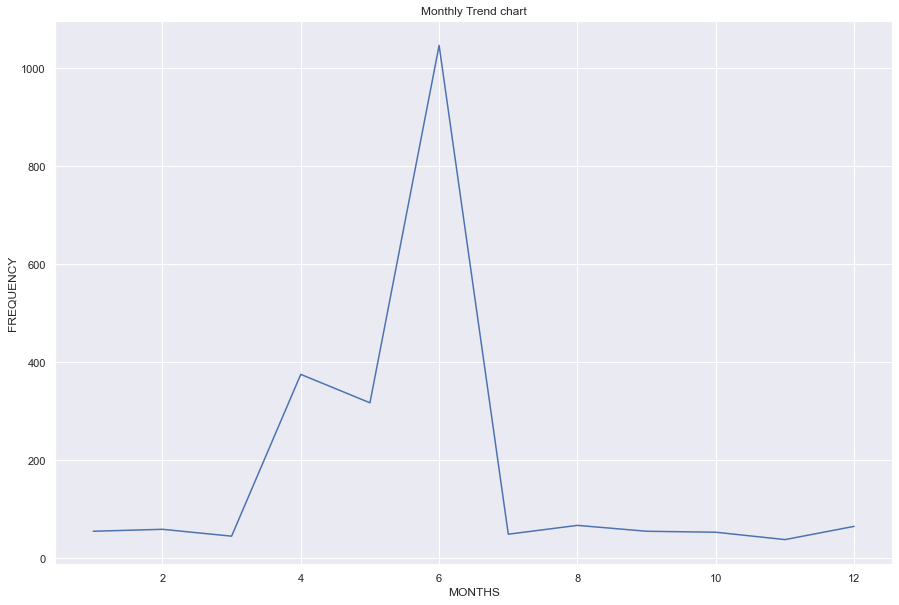

In [64]:
plt.figure(figsize=(15,10))
(data["Date_month_year"].dt.month).value_counts().sort_index().plot()
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("Monthly Trend chart")

Here we see that No of complaints were relatively low in all months except 4,5 and 6(April, May, June). 
No of Complaints is highest in the month of June

Text(0.5, 1.0, 'Daily Trend chart')

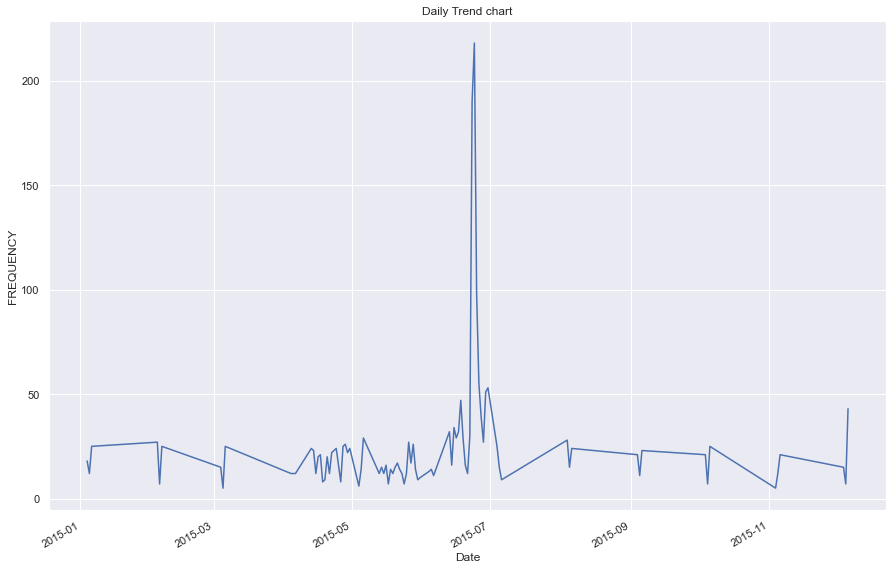

In [65]:
#(data["Date_month_year"].dt.month).value_counts().sort_index()
plt.figure(figsize=(15,10))
(data["Date_month_year"].value_counts().sort_index()).plot()
plt.xlabel("Date")
plt.ylabel("FREQUENCY")
plt.title("Daily Trend chart")

We notice that there is a Large Spike on a particular day in the middle of the chart.

In [66]:
data["New_Time"] = pd.to_datetime(data["Time"])

Text(0.5, 1.0, 'Hourly chart')

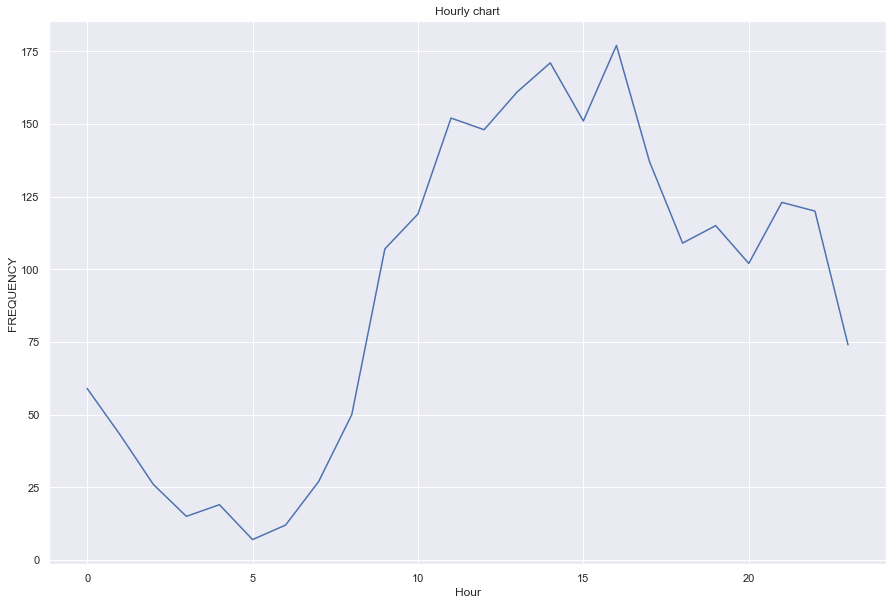

In [67]:
plt.figure(figsize=(15,10))
(data["New_Time"].dt.hour).value_counts().sort_index().plot()
plt.xlabel("Hour")
plt.ylabel("FREQUENCY")
plt.title("Hourly chart")

In a 24 hour period the majority of complaints are between 9am to 11pm.
The complaint frequency is at its peak around 12 to 16 hour.

Text(0.5, 1.0, 'Days of Week trend chart')

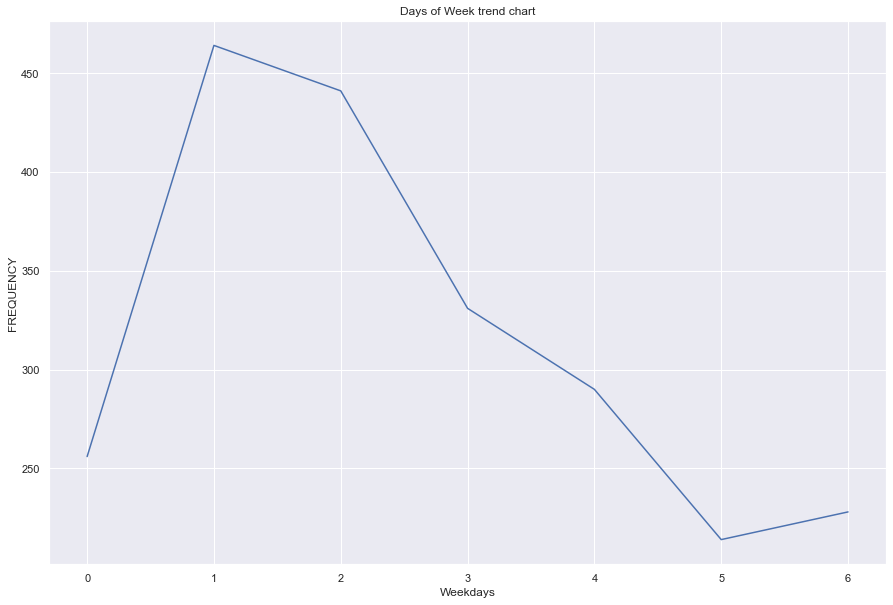

In [68]:
plt.figure(figsize=(15,10))
(data["Date_month_year"].dt.weekday).value_counts().sort_index().plot()
plt.xlabel("Weekdays")
plt.ylabel("FREQUENCY")
plt.title("Days of Week trend chart")

The Chart of weekday complains follows an inversely linear graph for weekdays.
No of complaints are relatively low on weekends.
No of complaints Peak during Monday.

Text(0.5, 1.0, 'Days of Month trend chart')

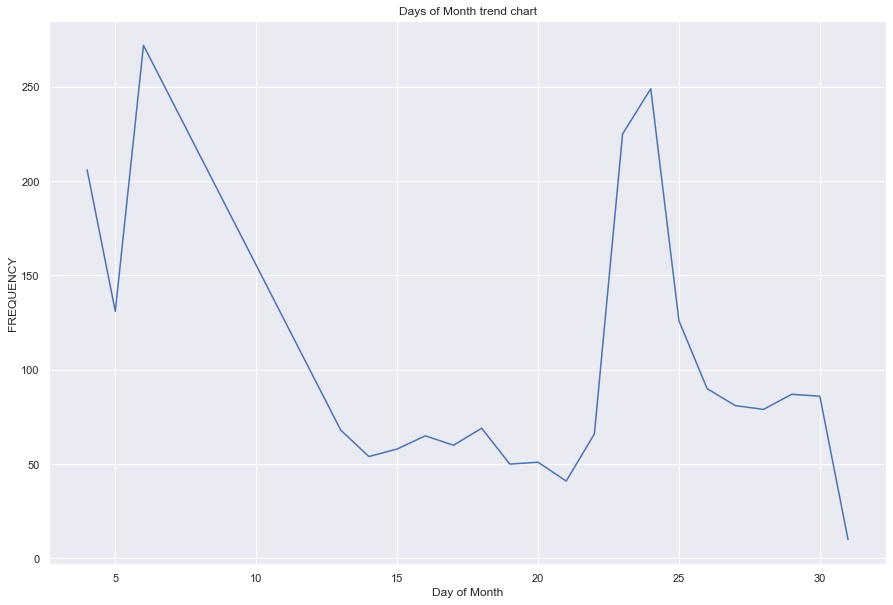

In [69]:
plt.figure(figsize=(15,10))
(data["Date_month_year"].dt.day).value_counts().sort_index().plot()
plt.xlabel("Day of Month")
plt.ylabel("FREQUENCY")
plt.title("Days of Month trend chart")

There is a spike in Complaints in the First and Fourth week of the month.

In [70]:
pd.Series(' '.join(data["Customer Complaint"]).lower().split()).value_counts()[:25]

comcast      1160
internet      508
service       411
and           277
billing       273
data          217
to            184
for           179
speed         112
of            111
cap           103
not            97
customer       87
issues         85
my             84
with           77
caps           76
practices      70
charges        69
complaint      68
no             65
speeds         65
bill           59
xfinity        58
unfair         58
dtype: int64

In [71]:
data["Customer Complaint"] = data['Customer Complaint'].str.lower()

In [72]:
Internet = ['internet','speed','data','cap','caps']
Billing = ['billing', 'charges', 'bill']
Service = ['service', 'customer', 'services']

In [73]:
Internet_re = '|'.join(Internet)
Internet_count = data[data['Customer Complaint'].str.contains(Internet_re)].count()

Billing_re = '|'.join(Billing)
Billing_count = data[data['Customer Complaint'].str.contains(Billing_re)].count()

Service_re = '|'.join(Service)
Service_count = data[data['Customer Complaint'].str.contains(Service_re)].count()

print("Internet Complains: {}/nBilling Complains: {}/nService Complains: {}".format(Internet_count, Billing_count, Service_count))

Internet Complains: Ticket #                       834
Customer Complaint             834
Date                           834
Date_month_year                834
Time                           834
Received Via                   834
City                           834
State                          834
Zip code                       834
Status                         834
Filing on Behalf of Someone    834
New_Time                       834
dtype: int64/nBilling Complains: Ticket #                       448
Customer Complaint             448
Date                           448
Date_month_year                448
Time                           448
Received Via                   448
City                           448
State                          448
Zip code                       448
Status                         448
Filing on Behalf of Someone    448
New_Time                       448
dtype: int64/nService Complains: Ticket #                       503
Customer Complaint             503
Date

Majority of Complaints are regarding Internet issue's, followed by Service and Billing problems.

In [74]:
 2224- (Internet_count+Billing_count+Service_count) 

Ticket #                       439
Customer Complaint             439
Date                           439
Date_month_year                439
Time                           439
Received Via                   439
City                           439
State                          439
Zip code                       439
Status                         439
Filing on Behalf of Someone    439
New_Time                       439
dtype: int64

In [75]:
data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [76]:
data['New_Status'] = ['Open' if status=='Open' or status=="Pending" else 'Closed'  for status in data['Status']]

In [77]:
data.sample(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Time,New_Status
1070,340029,comcast data limits and overage charges,2015-06-14,2015-06-14,4:11:14 PM,Internet,Knoxville,Tennessee,37917,Solved,No,2022-07-02 16:11:14,Closed
745,373954,comcast data charges,2015-06-30,2015-06-30,7:29:08 AM,Internet,Gadsden,Alabama,35904,Pending,No,2022-07-02 07:29:08,Open
1406,256792,comcast service problems for months; charging ...,2015-04-25,2015-04-25,11:34:25 AM,Internet,New Haven,Connecticut,6512,Closed,No,2022-07-02 11:34:25,Closed
361,369455,comcast refuses to uhold contract for 2 years ...,2015-06-26,2015-06-26,10:22:21 PM,Customer Care Call,Cazadero,California,95421,Pending,No,2022-07-02 22:22:21,Open
1811,298256,"comcast xfinity data cap in atlanta, ga",2015-05-19,2015-05-19,9:25:48 PM,Customer Care Call,Sandy Springs,Georgia,30342,Solved,No,2022-07-02 21:25:48,Closed


In [78]:
state_wise = data.groupby(['State', 'New_Status']).size().unstack()
state_wise

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<AxesSubplot:xlabel='State'>

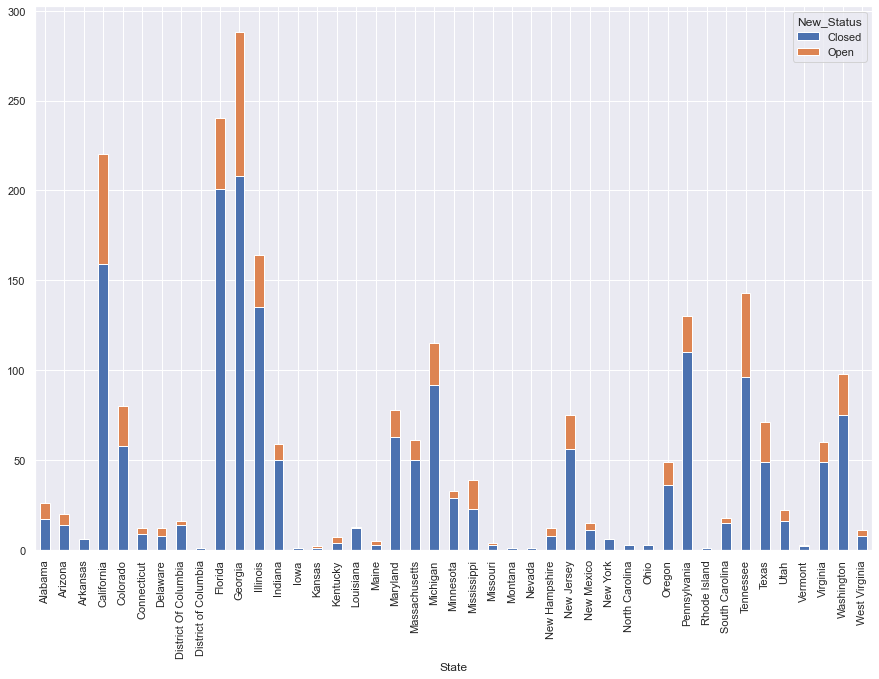

In [79]:
state_wise.plot(kind = "bar", stacked=True, figsize = (15,10))

In [80]:
data.groupby(['State']).size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [81]:
Open_Unresolved = data.groupby(['State',"New_Status"]).size().unstack()

In [82]:
Open_Unresolved.head()

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0


In [83]:
Open_Unresolved = Open_Unresolved.fillna(0)
Open_Unresolved

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [84]:
9.0/17.0 * 100

52.94117647058824

In [85]:
((Open_Unresolved["Open"]/Open_Unresolved['Closed']) * 100).sort_values(ascending=False)[:5]

State
Kansas         100.000000
Kentucky        75.000000
Mississippi     69.565217
Maine           66.666667
Alabama         52.941176
dtype: float64

In [86]:
data['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [87]:
resolved_percentage = data.groupby(['Received Via', 'New_Status']).size().unstack()
resolved_percentage

New_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [88]:
resolved_percentage['resolved']=resolved_percentage['Closed']/resolved_percentage['Closed'].sum()*100

In [89]:
resolved_percentage

New_Status,Closed,Open,resolved
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886


Thanks for reading my notebook. 